In [1]:
import matplotlib.pyplot as plt
import numpy as np
import qutip as qt

# System parameters
N = 4  # Number of sites
t = 1.0  # Hopping amplitude
mu = 0 # Chemical potential
F = 0 # Slope chemical potential rampage
U = 0.5  # Interaction strength
gamma_loss = 1  # Dissipation rate (electron loss)
gamma_gain = 1  # Pumping rate (electron creation)

# Function to create site-specific operators
def annihilate(site, N):
    """Creates an annihilation operator at a specific site."""
    op_list = [qt.qeye(2) for _ in range(N)]
    op_list[site] = qt.destroy(2)
    return qt.tensor(op_list)

def create(site, N):
    """Creates a creation operator at a specific site."""
    op_list = [qt.qeye(2) for _ in range(N)]
    op_list[site] = qt.create(2)
    return qt.tensor(op_list)

#def create(site, N):
#    """Creates a creation operator at a specific site."""
#    return annihilate(site, N).dag()

# Construct the Hamiltonian
H = 0
# Hopping term
H = sum(
    -t * (create(i, N) * annihilate(i+1, N) + create(i+1, N) * annihilate(i, N))
        for i in range(N-1))
# Chemical potential term
H += sum(
    (-mu-F * (i - (N - 1) // 2)) * (create(i, N) * annihilate(i, N)) 
        for i in range(N))
# Interacting term
H += sum(
    U * (create(i, N) * annihilate(i, N) * create(i+1, N) * annihilate(i+1, N))
        for i in range(N-1))

# Lindblad operators (electron loss and gain at each site)
L = []

#for i in range(N):
#    L.append(np.sqrt(gamma_loss) * create_annihilation_operator(i, N))  # Electron loss
#    L.append(np.sqrt(gamma_gain) * create_creation_operator(i, N))      # Electron gain

L.append(np.sqrt(gamma_gain) * create(0, N))      # Electron gain
L.append(np.sqrt(gamma_loss) * annihilate(N-1, N))  # Electron loss

# Initial state (vacuum state)
rho0 = qt.tensor([qt.basis(2, 0) * qt.basis(2, 0).dag() for _ in range(N)])

# Time evolution
tmax = 100
t_list = np.linspace(0, tmax, 10*tmax)

# Solve the master equation
result = qt.mesolve(H, rho0, t_list, L, [])

C:\Users\Andrea\anaconda3\Lib\site-packages\qutip\solver\solver_base.py:576: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


In [2]:
anticommutator = create(0, N) * annihilate(0, N) + annihilate(0, N) * create(0, N)
print(anticommutator)

Quantum object: dims=[[2, 2, 2, 2], [2, 2, 2, 2]], shape=(16, 16), type='oper', dtype=Dia, isherm=True
Qobj data =
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [3]:
commutator = - create(0, N) * annihilate(0, N) + annihilate(0, N) * create(0, N)
print(commutator)

Quantum object: dims=[[2, 2, 2, 2], [2, 2, 2, 2]], shape=(16, 16), type='oper', dtype=Dia, isherm=True
Qobj data =
[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.]
 [ 0.  0.  0. 

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Fock number', ylabel='Occupation probability'>)

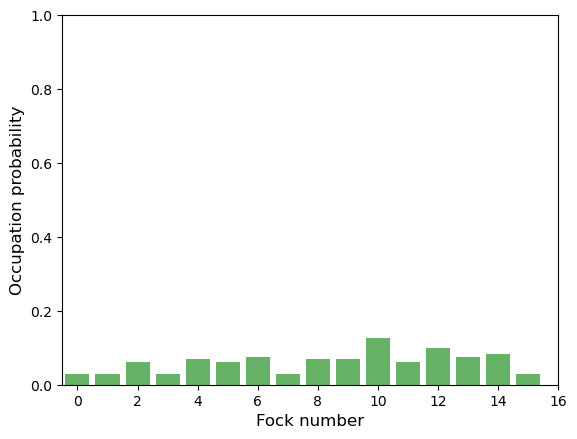

In [7]:
# Plot results
# The Fock states in QuTiP are ordered in binary counting order, meaning that each Fock state corresponds
# to a binary representation of occupation numbers
qt.plot_fock_distribution(result.states[-1])

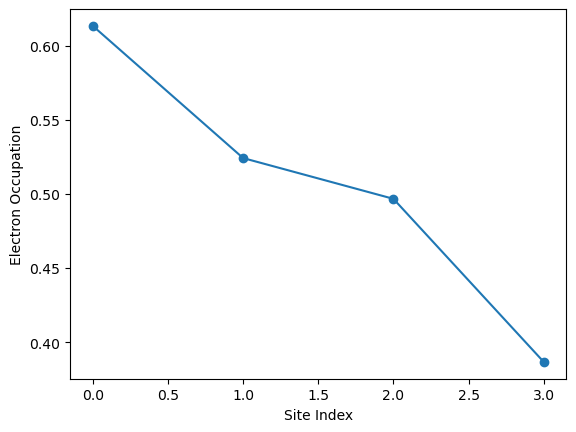

In [8]:
occupations = [qt.expect(create(i, N) * annihilate(i, N), result.states[-1]) for i in range(N)]
plt.plot(range(N), occupations, 'o-')
plt.xlabel("Site Index")
plt.ylabel("Electron Occupation")
plt.show()

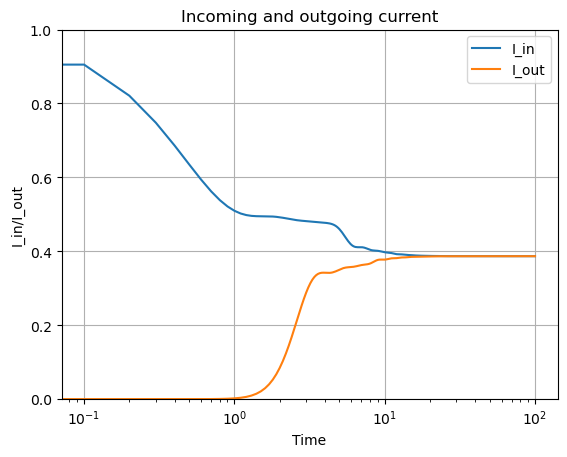

In [11]:
# Create number operator for the first and last sites
n1 = create(0, N) * annihilate(0, N)
nN = create(N-1, N) * annihilate(N-1, N)

# Compute the incoming current at each time step
curr_in = [gamma_gain*(1-qt.expect(n1, state)) for state in result.states]
curr_out = [gamma_loss*(qt.expect(nN, state)) for state in result.states]

# Plot occupation vs. time
plt.plot(t_list, curr_in, label="I_in")
plt.plot(t_list, curr_out, label="I_out")
plt.xscale("log")
plt.xlabel("Time")
plt.ylabel("I_in/I_out")
plt.title("Incoming and outgoing current")
plt.ylim(0, gamma_gain)
plt.legend()
plt.grid()
plt.show()

In [5]:
gamma_gain*(1-qt.expect(n1, result.states[-1]))

0.400000009319204